In [1]:
#import python pandas
import pandas as pd 

In [2]:
#read csv file 
data = pd.read_csv("(Enc)Data - Coded_SessionLogs.csv")

In [3]:
data.shape

(9701, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9701 entries, 0 to 9700
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   9701 non-null   int64 
 1   "Name"       9701 non-null   object
 2   Services     9701 non-null   object
 3   Course       3414 non-null   object
 4   SignInTime   8160 non-null   object
 5   SignOutTime  8160 non-null   object
 6   Period       8160 non-null   object
 7   Tutor        1940 non-null   object
dtypes: int64(1), object(7)
memory usage: 606.4+ KB


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20) #shows the all values in value_counts

In [6]:
data

,Unnamed: 0,"""Name""",Services,Course,SignInTime,SignOutTime,Period,Tutor
0,0,Jojo,No Sessions,NaN,NaN,NaN,NaN,NaN
1,1,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-07 09:05:00,2022-10-07 09:16:00,00:11:00,Thiri Wai Wai
2,2,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-05 11:17:00,2022-10-05 11:59:00,00:42:00,Hilary Lin
3,3,Shayla,Space to Study (STEM Center),NaN,2022-09-28 09:03:00,2022-09-28 10:06:00,01:03:00,NaN
4,4,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-09-21 09:50:00,2022-09-21 10:05:00,00:15:00,Thiri Wai Wai
...,...,...,...,...,...,...,...,...
9696,9696,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 14:58:00,2022-08-18 17:53:00,02:55:00,NaN
9697,9697,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 13:05:00,2022-08-18 13:48:00,00:43:00,NaN
9698,9698,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 11:03:00,2022-08-17 12:56:00,01:53:00,NaN
9699,9699,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 10:27:00,2022-08-17 10:50:00,00:23:00,NaN


In [7]:
count_Services = data['Services'].value_counts() #count # Services

In [8]:
data.rename(columns = {"Unnamed: 0":'id',
                       '"Name"':'encryted_name',
                       "Services":'service',
                       "Course":'course',
                       "SignInTime":'sign_in_time',
                       "SignOutTime":'sign_out_time',
                       "Period":'duration',
                       "Tutor":'tutor'},inplace = True)

In [9]:
Filter_Service_data = data['service'] != 'No Sessions'
data = data[Filter_Service_data]

In [10]:
#data['sign_in_time'] --> pd.to_datetime(data['sign_in_time'])
#dtype: object --> dtype: datetime64[ns]
#changes datatype
converted_in_time = pd.to_datetime(data['sign_in_time'])
converted_out_time = pd.to_datetime(data['sign_out_time'])

In [11]:
converted_in_time.dt.weekday

1       4
2       2
3       2
4       2
5       0
       ..
9696    3
9697    3
9698    2
9699    2
9700    2
Name: sign_in_time, Length: 8160, dtype: int64

In [12]:
#df.insert(location, new_column_name, insert_value)
# '.dt.hour' = .apply(lambda x : x.hour))
data.insert(7, 'hour_in', converted_in_time.dt.hour)
data.insert(8, 'hour_out', converted_out_time.dt.hour)
data.insert(9, 'weekday', converted_in_time.dt.weekday)

In [13]:
"""
filter STEM Center Hours
Mon-Thu 8:00 a.m. to 8:00 p.m.
Fri 8:00 am to 4:00 pm
"""
filter_MT = (
    (data['hour_in'] >= 8) & (data['hour_in'] <= 20) &
    (data['hour_out'] >= 8) & (data['hour_out'] <= 20) &
    (data['weekday'] <= 3)
)
filter_F = (
    (data['hour_in'] >= 8) & (data['hour_in'] <= 16) &
    (data['hour_out'] >= 8) & (data['hour_out'] <= 16) &
    (data['weekday'] == 4)
)
data = data[filter_MT | filter_F]

In [14]:
data

,id,encryted_name,service,course,sign_in_time,sign_out_time,duration,hour_in,hour_out,weekday,tutor
1,1,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-07 09:05:00,2022-10-07 09:16:00,00:11:00,9,9,4,Thiri Wai Wai
2,2,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-05 11:17:00,2022-10-05 11:59:00,00:42:00,11,11,2,Hilary Lin
3,3,Shayla,Space to Study (STEM Center),NaN,2022-09-28 09:03:00,2022-09-28 10:06:00,01:03:00,9,10,2,NaN
4,4,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-09-21 09:50:00,2022-09-21 10:05:00,00:15:00,9,10,2,Thiri Wai Wai
5,5,Shayla,Space to Study (STEM Center),NaN,2022-09-19 14:11:00,2022-09-19 17:41:00,03:30:00,14,17,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9696,9696,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 14:58:00,2022-08-18 17:53:00,02:55:00,14,17,3,NaN
9697,9697,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 13:05:00,2022-08-18 13:48:00,00:43:00,13,13,3,NaN
9698,9698,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 11:03:00,2022-08-17 12:56:00,01:53:00,11,12,2,NaN
9699,9699,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 10:27:00,2022-08-17 10:50:00,00:23:00,10,10,2,NaN


In [15]:
# removes the original index and replaces it with a new default index
data.reset_index(drop=True, inplace=True)  

In [16]:
data

,id,encryted_name,service,course,sign_in_time,sign_out_time,duration,hour_in,hour_out,weekday,tutor
0,1,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-07 09:05:00,2022-10-07 09:16:00,00:11:00,9,9,4,Thiri Wai Wai
1,2,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-05 11:17:00,2022-10-05 11:59:00,00:42:00,11,11,2,Hilary Lin
2,3,Shayla,Space to Study (STEM Center),NaN,2022-09-28 09:03:00,2022-09-28 10:06:00,01:03:00,9,10,2,NaN
3,4,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-09-21 09:50:00,2022-09-21 10:05:00,00:15:00,9,10,2,Thiri Wai Wai
4,5,Shayla,Space to Study (STEM Center),NaN,2022-09-19 14:11:00,2022-09-19 17:41:00,03:30:00,14,17,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8018,9696,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 14:58:00,2022-08-18 17:53:00,02:55:00,14,17,3,NaN
8019,9697,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 13:05:00,2022-08-18 13:48:00,00:43:00,13,13,3,NaN
8020,9698,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 11:03:00,2022-08-17 12:56:00,01:53:00,11,12,2,NaN
8021,9699,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 10:27:00,2022-08-17 10:50:00,00:23:00,10,10,2,NaN


In [17]:
#empty pandas DataFrame to keep track of the number of sessions
def make_data_week():
    date = {
        'monday': [0]*13,
        'tuesday': [0]*13,
        'wednesday': [0]*13,
        'thursday': [0]*13,
        'friday': [0]*13
    }
    tf = pd.DataFrame(date)
    tf.index = tf.index + 8
    return tf

In [18]:
make_data_week()

,monday,tuesday,wednesday,thursday,friday
8,0,0,0,0,0
9,0,0,0,0,0
10,0,0,0,0,0
11,0,0,0,0,0
12,0,0,0,0,0
13,0,0,0,0,0
14,0,0,0,0,0
15,0,0,0,0,0
16,0,0,0,0,0
17,0,0,0,0,0


In [19]:
data.shape[0]

8023

In [44]:
#used to select relevant service sessions from data
def get_filter(services):
    #make 8023 false
    filt = [False] * data.shape[0]
    #creates new filter for each service and make 8023 or selected services true
    for service in services:
        filt = filt | (data['service'] == service)
    return filt

In [36]:

def make_df_with_filter(services):
    #select relevant service sessions
    filt = get_filter(services)
    filt_data = data[filt]
    filt_data.reset_index(drop=True, inplace=True)
    
    data_week = make_data_week()
    
    for i in range(filt_data.shape[0]):
        hour_in = filt_data['hour_in'][i]
        hour_out = filt_data['hour_out'][i]
        weekday = filt_data['weekday'][i]
        
        for hour in range(hour_in, hour_out + 1):
            data_week.loc[hour][weekday] += 1
            
    return data_week


In [37]:
data_week = make_df_with_filter(  # passes in *list of strings
    [
        'Space to Study (STEM Center)',
        'Open Lab (TBA Hours)',
        'In-person Tutoring (STEM Center)',
        'Space to Study (MESA)',
        'Virtual Tutoring',
        'Workshop Attendance',
        'Fabrication Lab'
    ]
)
data_week

,monday,tuesday,wednesday,thursday,friday
8,67,62,61,56,73
9,183,165,190,173,196
10,437,275,464,276,269
11,382,355,462,390,348
12,514,402,586,407,415
13,537,389,571,312,386
14,396,390,353,320,297
15,333,366,328,299,205
16,558,377,482,308,92
17,461,323,435,284,0


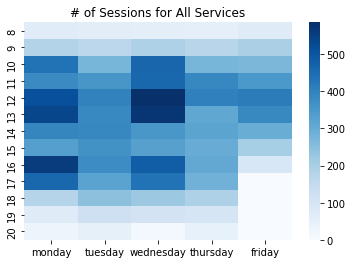

In [38]:
import seaborn as sns
heatmap = sns.heatmap(data_week, cmap='Blues').set_title('# of Sessions for All Services')